In [1]:
# !pip install pandas matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Load the Walmart Sales dataset
data = pd.read_csv('big_data_sys/cw_1/walmart_sales.csv')

## 2. Data Preprocessing

In [4]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="mixed")

# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values as appropriate
data.fillna(0, inplace=True)  # Example: filling missing values with 0


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


## weekly sales trend to see how sales have evolved over time.

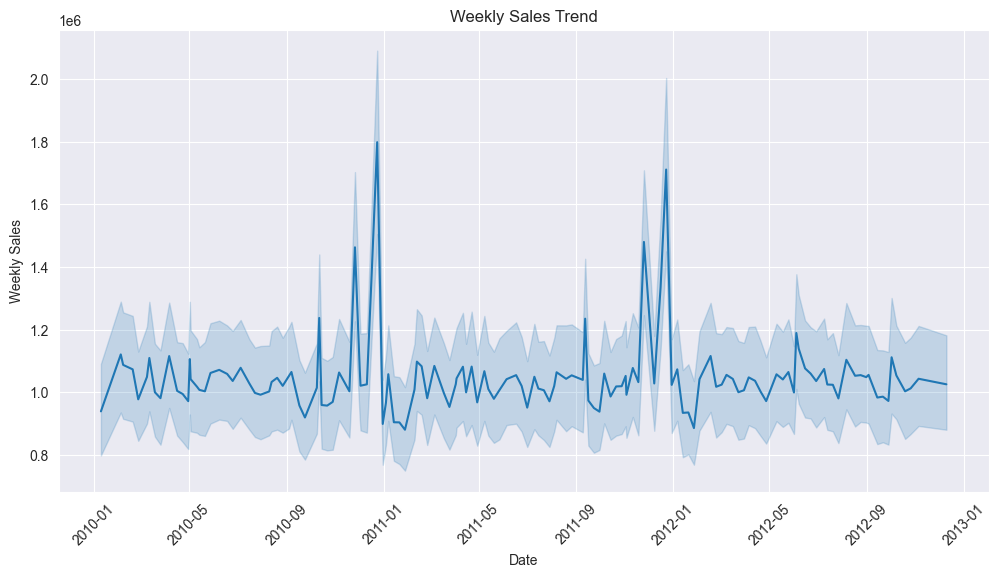

In [5]:
# Plot Weekly Sales Trend over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()


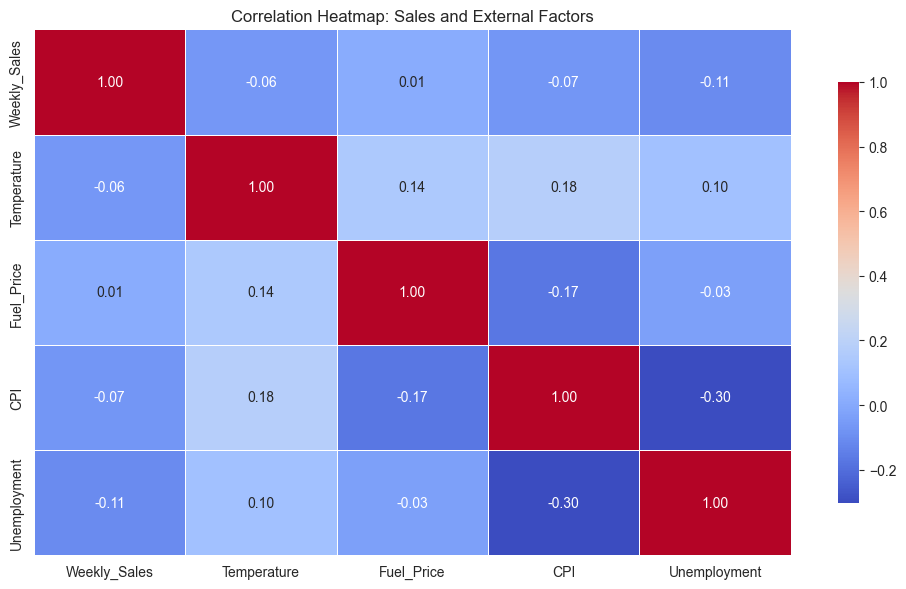

In [6]:
# Select the relevant columns for correlation analysis
corr_data = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

# Calculate the correlation matrix
correlation_matrix = corr_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})

# Add title and labels
plt.title('Correlation Heatmap: Sales and External Factors')
plt.tight_layout()

# Show the plot
plt.show()


## Holiday_Flag to analyze if holidays influence sales.

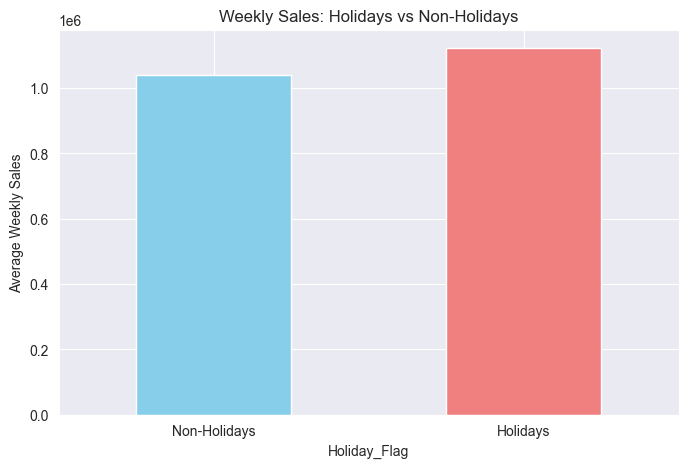

In [7]:
# Group the data by Holiday_Flag and calculate the average weekly sales
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Set custom colors for each bar
colors = ['skyblue', 'lightcoral']  # Different colors for Non-Holidays and Holidays

# Plotting the bar chart
plt.figure(figsize=(8, 5))
holiday_sales.plot(kind='bar', color=colors)

# Adding titles and labels
plt.title('Weekly Sales: Holidays vs Non-Holidays')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holidays', 'Holidays'], rotation=0)

# Show the plot
plt.show()


## Explore if the local temperature impacts sales

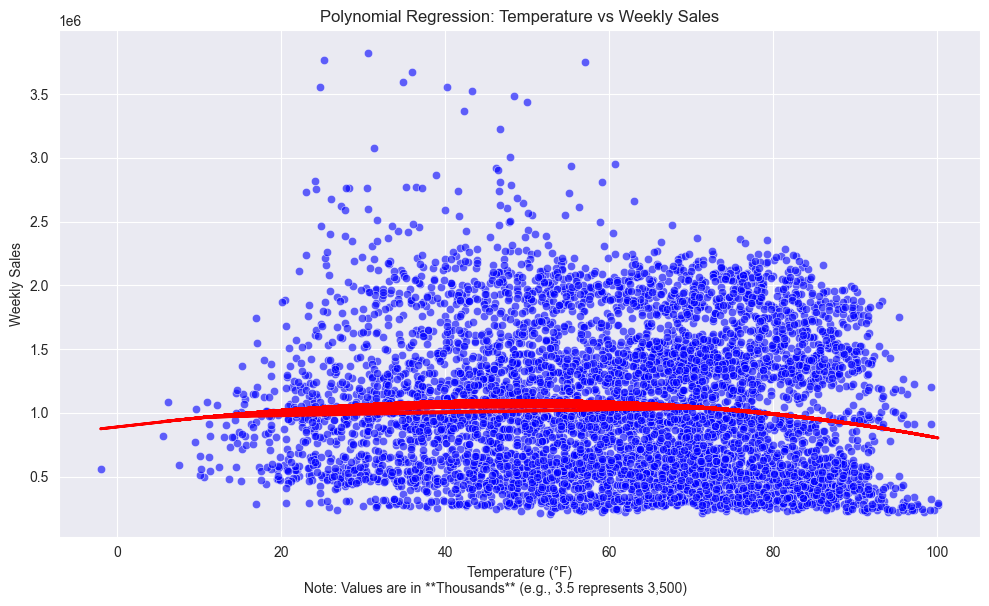

In [8]:
# Assuming you have already loaded the data
# X = Temperature and y = Weekly_Sales
X = data['Temperature'].values.reshape(-1, 1)
y = data['Weekly_Sales'].values

# Creating a Polynomial model
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fitting the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plotting the Polynomial Regression Curve
plt.figure(figsize=(10, 6))

# Scatter plot of original data
sns.scatterplot(x=data['Temperature'], y=data['Weekly_Sales'], color='blue', alpha=0.6)

# Plot the Polynomial regression curve
plt.plot(data['Temperature'], y_pred, color='red', linewidth=2)

# Adding titles and labels
plt.title('Polynomial Regression: Temperature vs Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')

# Add a text annotation beneath the y-axis
plt.figtext(0.5, 0.01, 'Note: Values are in **Thousands** (e.g., 3.5 represents 3,500)', ha='center', va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


## Fuel prices may affect consumer spending patterns

In [9]:
# Features (independent variables)
X = data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']]

# Target variable (dependent variable)
y = data['Weekly_Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 475432.53295882524


## Visualizing actual vs predicted sales

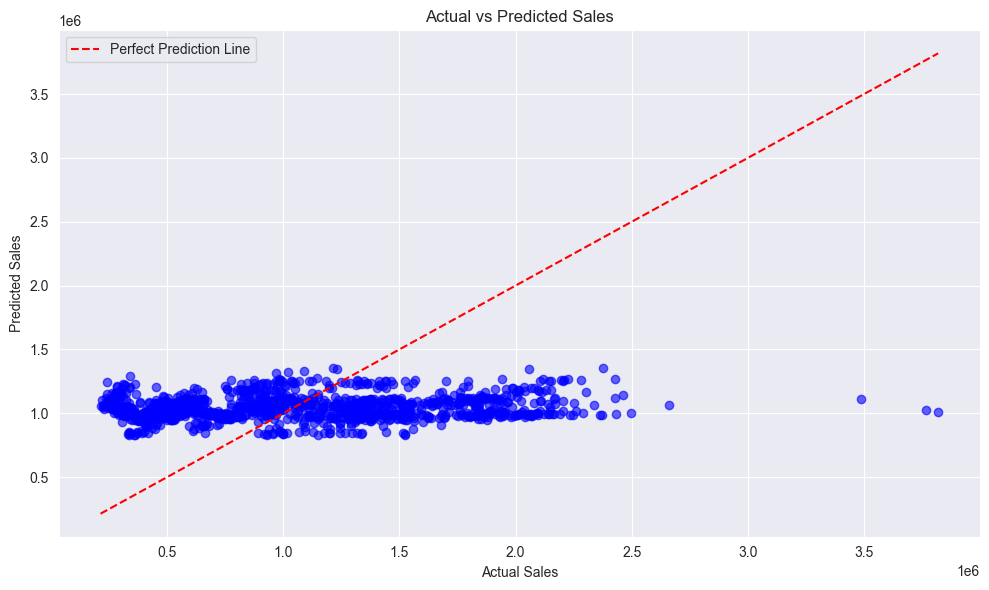

In [10]:
# Scatter plot: Actual vs Predicted Sales
plt.figure(figsize=(10,6))
plt.scatter(y_test.values, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.tight_layout()
plt.show()
